In [1]:
import os
import pandas as pd
from datetime import datetime, time
import matplotlib.pyplot as plt

In [2]:
directory = 'smart_parking_data'
files = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith('.txt')]
files

['smart_parking_data/test.txt', 'smart_parking_data/Output.txt']

In [3]:
parking_spaces = pd.DataFrame(columns=['Date_time', 'free_parking_spaces', 'occupied_spaces'])

In [4]:
read_f = [pd.read_csv(file, usecols= ['Date_time', 'free_parking_spaces', 'occupied_spaces']) for file in files]
parking_spaces = pd.concat(read_f)

In [5]:
# in case of memory errors:
# del read_f

In [6]:
parking_spaces.head()

,Date_time,free_parking_spaces,occupied_spaces
0,2020-02-26 13:01:22,8,10
1,2020-02-26 13:03:06,8,10
2,2020-02-26 13:06:28,8,10
3,2020-02-26 13:08:12,8,10
4,2020-02-26 13:11:34,9,9


In [7]:
parking_spaces['Time'] = pd.to_datetime(parking_spaces['Date_time'])
parking_spaces.drop('Date_time', axis=1, inplace=True)

In [8]:
parking_spaces['Weekday'] = parking_spaces['Time'].dt.day_name()
parking_spaces['Weekday'] = pd.Categorical(parking_spaces['Weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
parking_spaces.head()

,free_parking_spaces,occupied_spaces,Time,Weekday
0,8,10,2020-02-26 13:01:22,Wednesday
1,8,10,2020-02-26 13:03:06,Wednesday
2,8,10,2020-02-26 13:06:28,Wednesday
3,8,10,2020-02-26 13:08:12,Wednesday
4,9,9,2020-02-26 13:11:34,Wednesday


In [9]:
days = parking_spaces.groupby('Weekday').mean().round(0).reset_index()[['Weekday', 'free_parking_spaces', 'occupied_spaces']]
days

,Weekday,free_parking_spaces,occupied_spaces
0,Monday,9.0,9.0
1,Tuesday,7.0,11.0
2,Wednesday,8.0,10.0
3,Thursday,7.0,11.0
4,Friday,NaN,NaN
5,Saturday,9.0,9.0
6,Sunday,NaN,NaN


In [10]:
days_std = parking_spaces.groupby('Weekday').std().reset_index()[['Weekday', 'free_parking_spaces', 'occupied_spaces']]
days_std


,Weekday,free_parking_spaces,occupied_spaces
0,Monday,2.328353,2.315330
1,Tuesday,2.857806,2.840728
2,Wednesday,1.821421,1.821421
3,Thursday,2.216112,2.215741
4,Friday,NaN,NaN
5,Saturday,2.679502,2.679502
6,Sunday,NaN,NaN


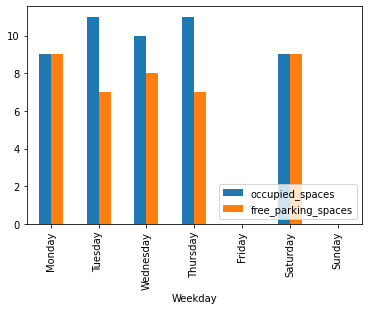

In [11]:
ax = days.plot.bar(x = 'Weekday', y = ['occupied_spaces', 'free_parking_spaces']).legend( loc = 'lower right')
ax.figure.savefig('smart_parking_charts/days_bar.png', bbox_inches = "tight")

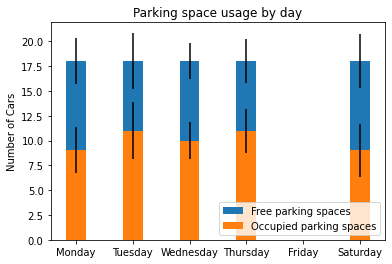

In [12]:
labels =  days['Weekday']
occupied_means = days['occupied_spaces']
free_means = days['free_parking_spaces']
occupied_std = days_std['occupied_spaces']
free_std = days_std['free_parking_spaces']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, free_means, width, yerr=free_std, bottom=occupied_means,
       label='Free parking spaces')
ax.bar(labels, occupied_means, width, yerr=occupied_std, label='Occupied parking spaces')

ax.set_ylabel('Number of Cars')
ax.set_title('Parking space usage by day')
ax.legend(loc = 'lower right')

plt.show()
ax.figure.savefig('smart_parking_charts/days_bar.png', bbox_inches = "tight", figsize=(15, 10))

In [13]:
#days.plot.box(x = 'weekday', y = ['occupied_spaces', 'weekday'])

In [14]:
minutes = parking_spaces.groupby([parking_spaces['Time'].map(lambda x : time(x.hour, x.minute)), 'Weekday']).mean().round(0).reset_index()

minutes[minutes['free_parking_spaces']==1 ]

,Time,Weekday,free_parking_spaces,occupied_spaces
610,12:01:00,Tuesday,1.0,17.0
911,12:59:00,Tuesday,1.0,17.0
1305,16:15:00,Thursday,1.0,17.0


In [15]:
minutes = parking_spaces.groupby([parking_spaces['Time'].map(lambda x : time(x.hour, x.minute)), 'Weekday']).mean().round(0).reset_index()
minutes = minutes.pivot(index='Time', columns='Weekday', values='occupied_spaces').fillna(method='backfill', axis=0)
minutes.head()
#2andahalf mins

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
07:01:00,8.0,6.0,9.0,6.0,NaN,5.0,NaN
07:02:00,8.0,7.0,9.0,6.0,NaN,5.0,NaN
07:04:00,8.0,6.0,9.0,8.0,NaN,5.0,NaN
07:05:00,8.0,6.0,9.0,6.0,NaN,5.0,NaN
07:06:00,8.0,6.0,9.0,6.0,NaN,5.0,NaN


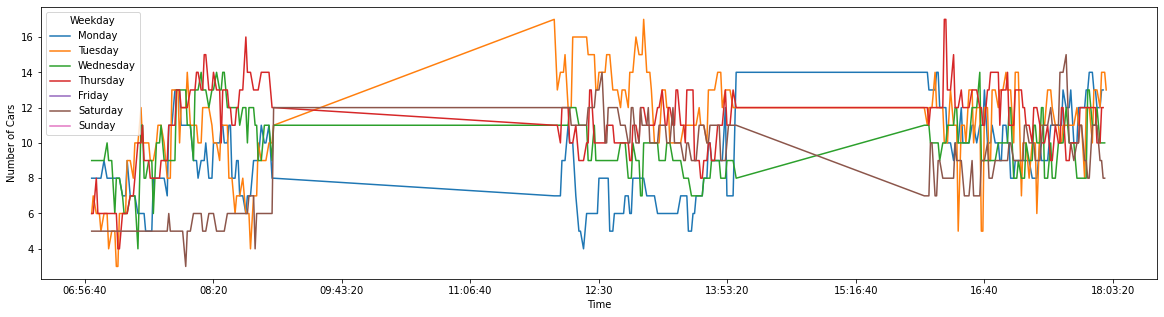

In [16]:
ax = minutes.plot.line(figsize=(20, 5), )
ax.set_ylabel('Number of Cars')
ax.figure.savefig('smart_parking_charts/days_line.png', bbox_inches = "tight")

In [17]:
minutes

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Time,,,,,,,
07:01:00,8.0,6.0,9.0,6.0,NaN,5.0,NaN
07:02:00,8.0,7.0,9.0,6.0,NaN,5.0,NaN
07:04:00,8.0,6.0,9.0,8.0,NaN,5.0,NaN
07:05:00,8.0,6.0,9.0,6.0,NaN,5.0,NaN
07:06:00,8.0,6.0,9.0,6.0,NaN,5.0,NaN
...,...,...,...,...,...,...,...
17:55:00,12.0,12.0,10.0,10.0,NaN,9.0,NaN
17:56:00,13.0,14.0,10.0,12.0,NaN,9.0,NaN
17:57:00,13.0,14.0,10.0,12.0,NaN,8.0,NaN


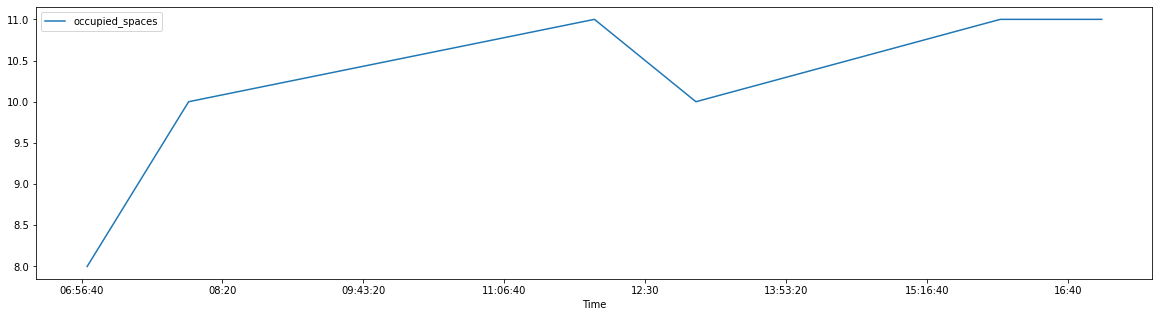

In [18]:
hours = parking_spaces.groupby(parking_spaces['Time'].map(lambda x : time(x.hour))).mean().round(0).reset_index()
ax = hours.plot.line(x = 'Time', y = 'occupied_spaces', figsize=(20, 5))
ax.figure.savefig('smart_parking_charts/timesofday_line.png', bbox_inches = "tight")

In [19]:
parking_spaces['delta_time'] = (parking_spaces['Time']-parking_spaces['Time'].shift()).dt.seconds
parking_spaces['delta_cars'] = (parking_spaces['occupied_spaces']-parking_spaces['occupied_spaces'].shift()).fillna(0)
parking_spaces.head()

,free_parking_spaces,occupied_spaces,Time,Weekday,delta_time,delta_cars
0,8,10,2020-02-26 13:01:22,Wednesday,NaN,0.0
1,8,10,2020-02-26 13:03:06,Wednesday,104.0,0.0
2,8,10,2020-02-26 13:06:28,Wednesday,202.0,0.0
3,8,10,2020-02-26 13:08:12,Wednesday,104.0,0.0
4,9,9,2020-02-26 13:11:34,Wednesday,202.0,-1.0


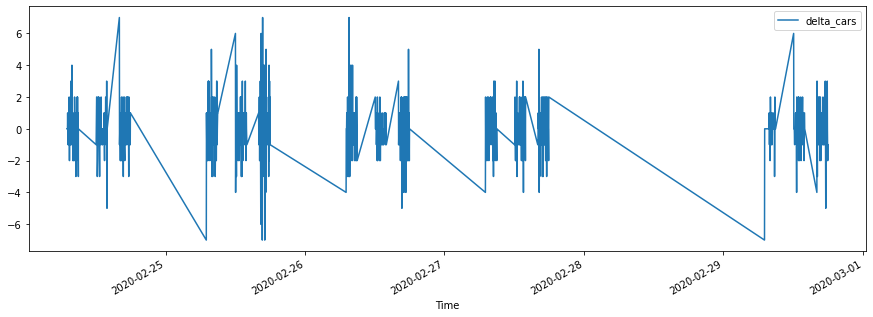

In [20]:
ax = parking_spaces.plot.line(x = 'Time', y = 'delta_cars', figsize=(15, 5))

In [21]:
parking_spaces['change_per_sec'] = parking_spaces.delta_cars/parking_spaces.delta_time

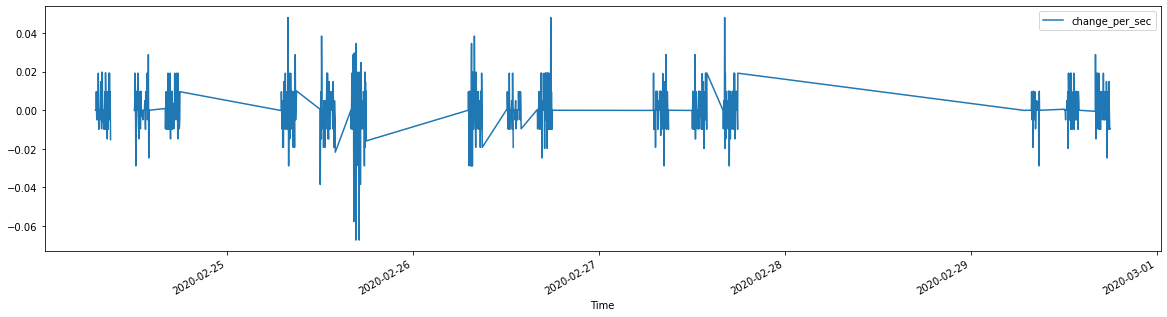

In [22]:
parking_spaces.plot.line(x = 'Time', y = 'change_per_sec', figsize=(20, 5))

In [23]:
parking_spaces['occupied_spaces'].mean()

9.89015691868759

In [24]:
parking_spaces['occupied_spaces'].std()

2.6072815845350563